# Project || Supervised Machine Learning: Classification || 

## Heart Attack Analysis & Prediction

In [1]:
import os, seaborn as sns, pandas as pd, numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

from scipy.special import inv_boxcox

from sklearn.model_selection import train_test_split


import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

### Data Set

In [2]:
# Getting the dataset

data = pd.read_csv('heart.csv')

print(data.shape)


(303, 14)


In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<AxesSubplot:>

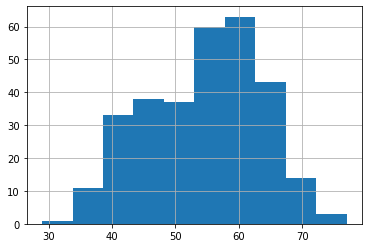

In [7]:
data.age.hist()

<AxesSubplot:>

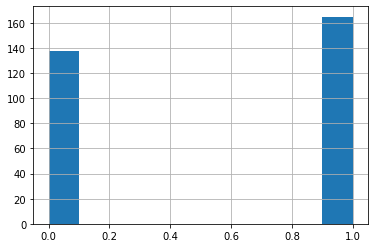

In [8]:
data.output.hist()

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

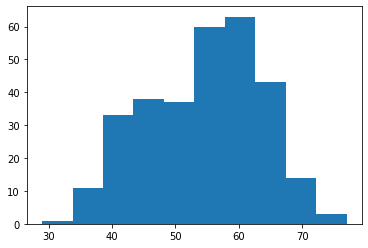

In [9]:
plt.hist(data["age"])

C:\Users\Amin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


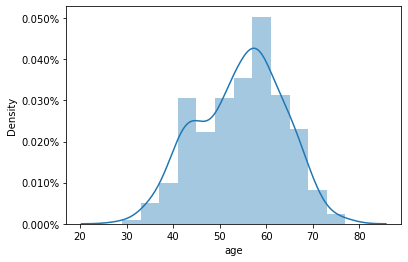

In [10]:
import matplotlib.ticker as mtick

# plt.figure

# ax.plot(perc, data["age"])

fig = sns.distplot(data["age"])
ax = data["age"]
fig.yaxis.set_major_formatter(mtick.PercentFormatter())



C:\Users\Amin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Amin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Amin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

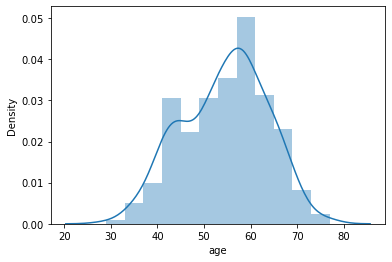

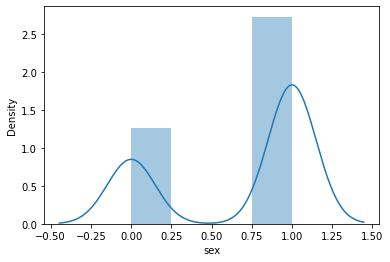

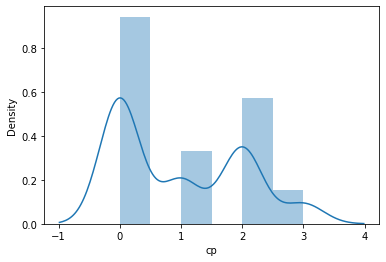

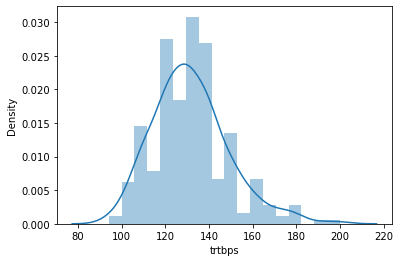

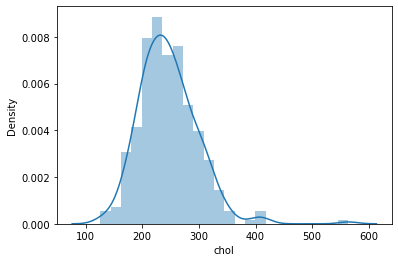

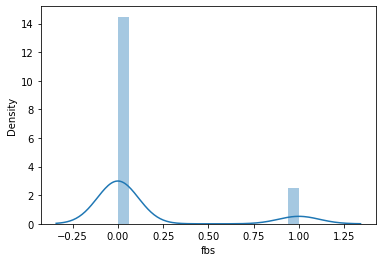

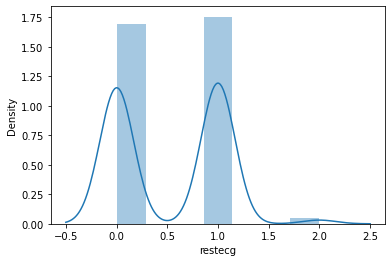

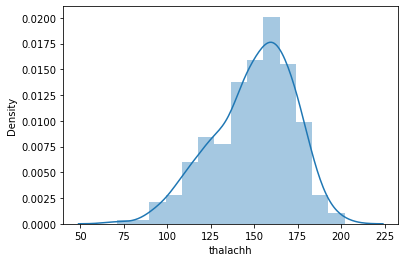

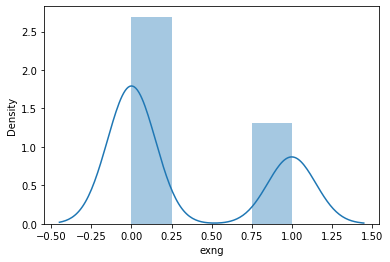

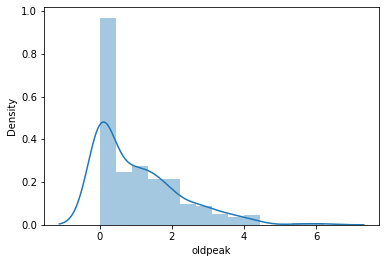

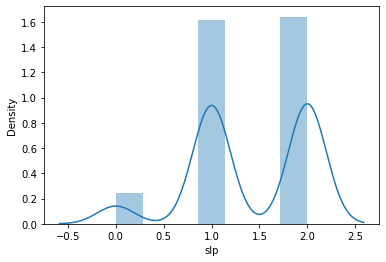

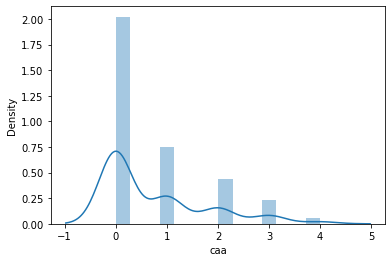

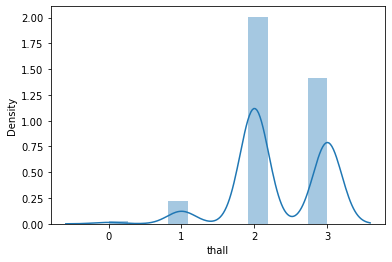

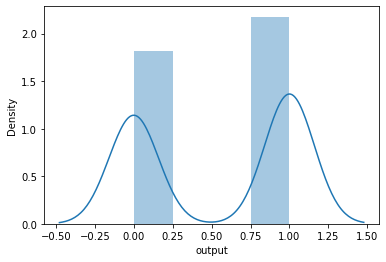

In [11]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    fig = sns.distplot(data[col])

In [12]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Correlation of features

In [13]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
#     print(coord)
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [14]:
corr_values

,feature1,feature2,correlation,abs_correlation
0,age,sex,-0.098447,0.098447
1,age,cp,-0.068653,0.068653
2,age,trtbps,0.279351,0.279351
3,age,chol,0.213678,0.213678
4,age,fbs,0.121308,0.121308
...,...,...,...,...
73,oldpeak,caa,0.222682,0.222682
74,oldpeak,thall,0.210244,0.210244
75,slp,caa,-0.080155,0.080155
76,slp,thall,-0.104764,0.104764


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

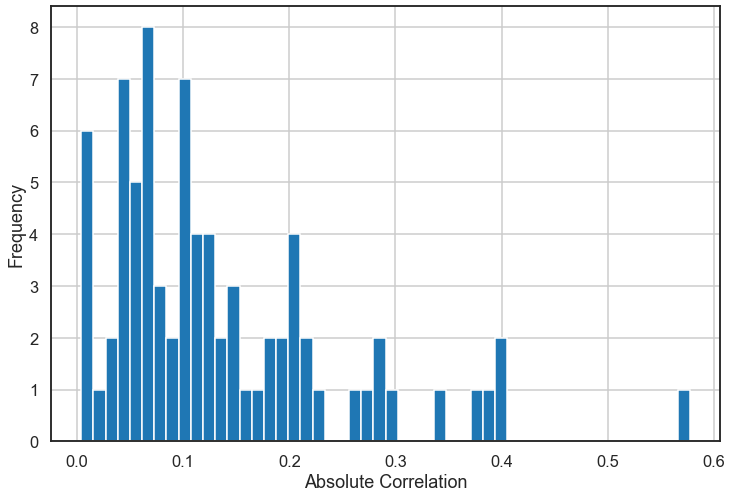

In [16]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [17]:
# corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.5')

corr_values.sort_values('correlation', ascending=False)

,feature1,feature2,correlation,abs_correlation
65,thalachh,slp,0.386784,0.386784
27,cp,thalachh,0.295762,0.295762
68,exng,oldpeak,0.288223,0.288223
2,age,trtbps,0.279351,0.279351
10,age,caa,0.276326,0.276326
...,...,...,...,...
64,thalachh,oldpeak,-0.344187,0.344187
63,thalachh,exng,-0.378812,0.378812
28,cp,exng,-0.394280,0.394280
6,age,thalachh,-0.398522,0.398522


In [18]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.3')

,feature1,feature2,correlation,abs_correlation
65,thalachh,slp,0.386784,0.386784
64,thalachh,oldpeak,-0.344187,0.344187
63,thalachh,exng,-0.378812,0.378812
28,cp,exng,-0.394280,0.394280
6,age,thalachh,-0.398522,0.398522
72,oldpeak,slp,-0.577537,0.577537


### Splitting Data in Train and test data

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.output))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'output']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'output']

In [20]:
y_train.value_counts(normalize=True)

1    0.542453
0    0.457547
Name: output, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

1    0.549451
0    0.450549
Name: output, dtype: float64

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [23]:
lr

LogisticRegression(solver='liblinear')

In [24]:
print(lr)

LogisticRegression(solver='liblinear')


In [25]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [26]:
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [27]:
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]


for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    print (lab)
    print(mod)
    print(coeffs)
    coeff_label = pd.MultiIndex(levels=[[lab], [0]], 
                                 codes=[[0], [0]])
    print(coeff_label)
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr
LogisticRegression(solver='liblinear')
[[ 0.00390184 -1.32274153  1.04326903 -0.0038669  -0.00969931  0.10747954
   0.20623649  0.03330839 -0.83165556 -0.56190065  0.59644586 -0.60019425
  -0.91468484]]
MultiIndex([('lr', 0)],
           )
l1
LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')
[[-0.00261242 -1.82591767  1.14438066 -0.00585521 -0.01237474  0.24375692
   0.2146273   0.03231586 -1.05870129 -0.55904247  0.73921849 -0.65831711
  -1.04193906]]
MultiIndex([('l1', 0)],
           )
l2
LogisticRegressionCV(cv=4, solver='liblinear')
[[ 0.00431976 -1.57493166  1.1028469  -0.00437092 -0.01073341  0.16601487
   0.2343668   0.03479149 -0.94342188 -0.55539085  0.67524615 -0.63451782
  -0.9730454 ]]
MultiIndex([('l2', 0)],
           )


,lr,l1,l2
,0,0,0
2,1.043269,1.144381,1.102847
0,0.003902,-0.002612,0.004320
3,-0.003867,-0.005855,-0.004371
10,0.596446,0.739218,0.675246
1,-1.322742,-1.825918,-1.574932
7,0.033308,0.032316,0.034791
4,-0.009699,-0.012375,-0.010733
6,0.206236,0.214627,0.234367
8,-0.831656,-1.058701,-0.943422


In [28]:
coefficients.head()

,lr,l1,l2
,0,0,0
0,0.003902,-0.002612,0.004320
1,-1.322742,-1.825918,-1.574932
2,1.043269,1.144381,1.102847
3,-0.003867,-0.005855,-0.004371
4,-0.009699,-0.012375,-0.010733


In [29]:
coefficients['lr']

,0
0,0.003902
1,-1.322742
2,1.043269
3,-0.003867
4,-0.009699
5,0.107480
6,0.206236
7,0.033308
8,-0.831656
9,-0.561901


<AxesSubplot:>

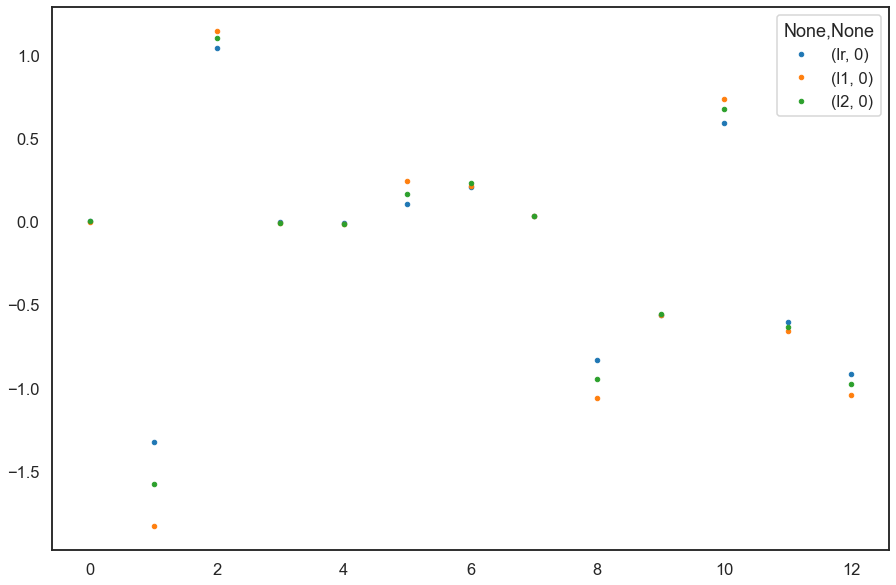

In [30]:

coefficients.plot(style='.', figsize=(15, 10))

<AxesSubplot:>

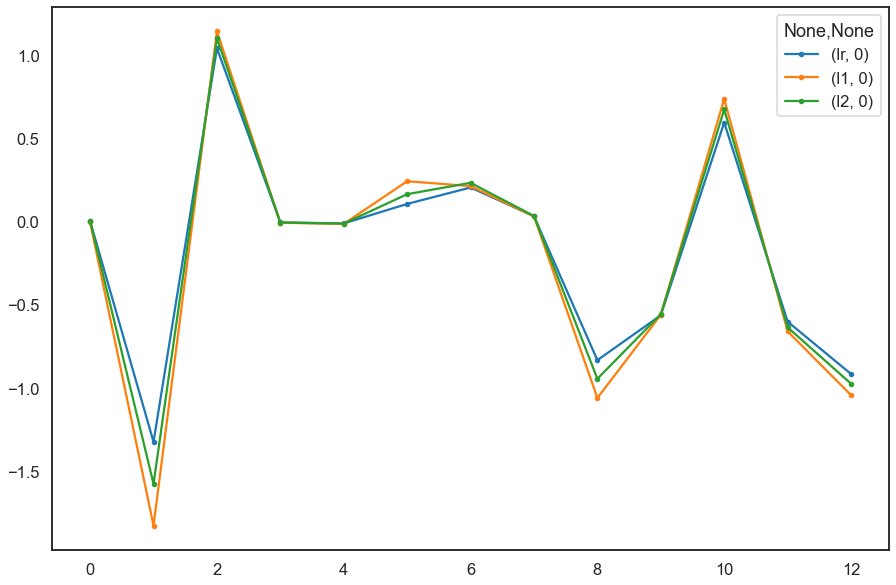

In [31]:
coefficients.plot(style='.-', figsize=(15, 10))

<AxesSubplot:>

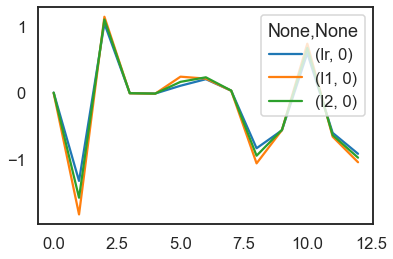

In [32]:
coefficients.plot()

C:\Users\Amin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

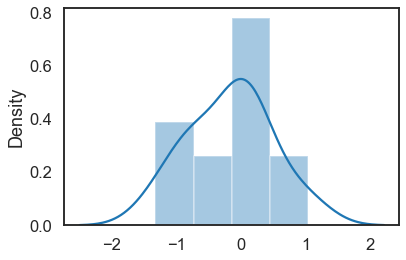

In [33]:
sns.distplot(coefficients["lr"])



C:\Users\Amin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

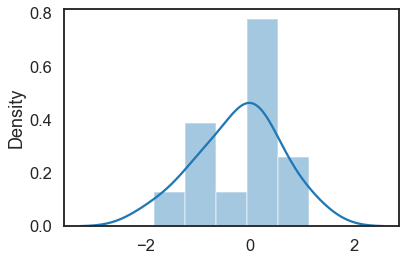

In [34]:
sns.distplot(coefficients["l1"])

C:\Users\Amin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

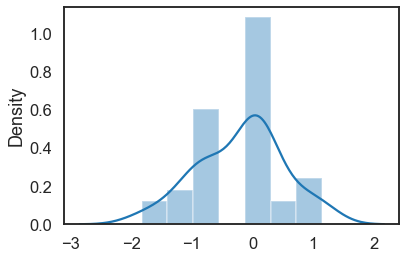

In [35]:
sns.distplot(coefficients)

In [36]:
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,1,1,1
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1


In [37]:
y_prob.head()

,lr,l1,l2
0,0.987076,0.993203,0.990747
1,0.708122,0.693875,0.702828
2,0.962319,0.977805,0.972244
3,0.918557,0.938755,0.936119
4,0.626855,0.630662,0.634813


In [38]:
score_total = pd.DataFrame(columns=["model", "accuracy","precission","recall","F1"])

In [39]:
score_total

,model,accuracy,precission,recall,F1


In [40]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    print(lab)
    
    

    score_total = score_total.append({"model" :lab, "accuracy": accuracy,"precission":precision,"recall":recall,"F1":fscore},ignore_index=True)
    
              

    
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy},
#                               'auc':auc}, 
                             name=lab))




metrics = pd.concat(metrics, axis=1)


lr
l1
l2


In [41]:
metrics

,lr,l1,l2
precision,0.746663,0.758132,0.746663
recall,0.747253,0.758242,0.747253
fscore,0.746135,0.756692,0.746135
accuracy,0.747253,0.758242,0.747253


In [42]:
score_total

,model,accuracy,precission,recall,F1
0,lr,0.747253,0.746663,0.747253,0.746135
1,l1,0.758242,0.758132,0.758242,0.756692
2,l2,0.747253,0.746663,0.747253,0.746135


### KNN Model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [44]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.59      0.54      0.56        41
           1       0.65      0.70      0.67        50

    accuracy                           0.63        91
   macro avg       0.62      0.62      0.62        91
weighted avg       0.62      0.63      0.62        91

Accuracy score:  0.63
F1 Score:  0.67


In [45]:
print(knn)

KNeighborsClassifier(n_neighbors=3)


In [46]:
score_total = score_total.append({"model" :knn, 
                                  "accuracy": (accuracy_score(y_test, y_pred)),
                                  "precission":0.65,
                                  "recall":0.70,
                                  "F1":(f1_score(y_test, y_pred))},
                                 ignore_index=True)

In [47]:
score_total

,model,accuracy,precission,recall,F1
0,lr,0.747253,0.746663,0.747253,0.746135
1,l1,0.758242,0.758132,0.758242,0.756692
2,l2,0.747253,0.746663,0.747253,0.746135
3,KNeighborsClassifier(n_neighbors=3),0.626374,0.650000,0.700000,0.673077


In [48]:
### BEGIN SOLUTION
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        41
           1       0.66      0.70      0.68        50

    accuracy                           0.64        91
   macro avg       0.63      0.63      0.63        91
weighted avg       0.64      0.64      0.64        91

Accuracy score:  0.64
F1 Score:  0.68


In [49]:
score_total = score_total.append({"model" :knn, 
                                  "accuracy": (accuracy_score(y_test, y_pred)),
                                  "precission":0.66,
                                  "recall":0.70,
                                  "F1":(f1_score(y_test, y_pred))},
                                 ignore_index=True)

score_total

,model,accuracy,precission,recall,F1
0,lr,0.747253,0.746663,0.747253,0.746135
1,l1,0.758242,0.758132,0.758242,0.756692
2,l2,0.747253,0.746663,0.747253,0.746135
3,KNeighborsClassifier(n_neighbors=3),0.626374,0.650000,0.700000,0.673077
4,KNeighborsClassifier(weights='distance'),0.637363,0.660000,0.700000,0.679612


In [50]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [51]:
error_results

,K,Error Rate
0,1,0.4396
1,2,0.4396
2,3,0.3736
3,4,0.3736
4,5,0.3626
5,6,0.3736
6,7,0.3516
7,8,0.3736
8,9,0.3736
9,10,0.3516


In [52]:
f1_results

,K,F1 Score
0,1,0.6154
1,2,0.6154
2,3,0.6731
3,4,0.6731
4,5,0.6796
5,6,0.6731
6,7,0.6981
7,8,0.6667
8,9,0.6731
9,10,0.6923


<Figure size 1800x1200 with 0 Axes>

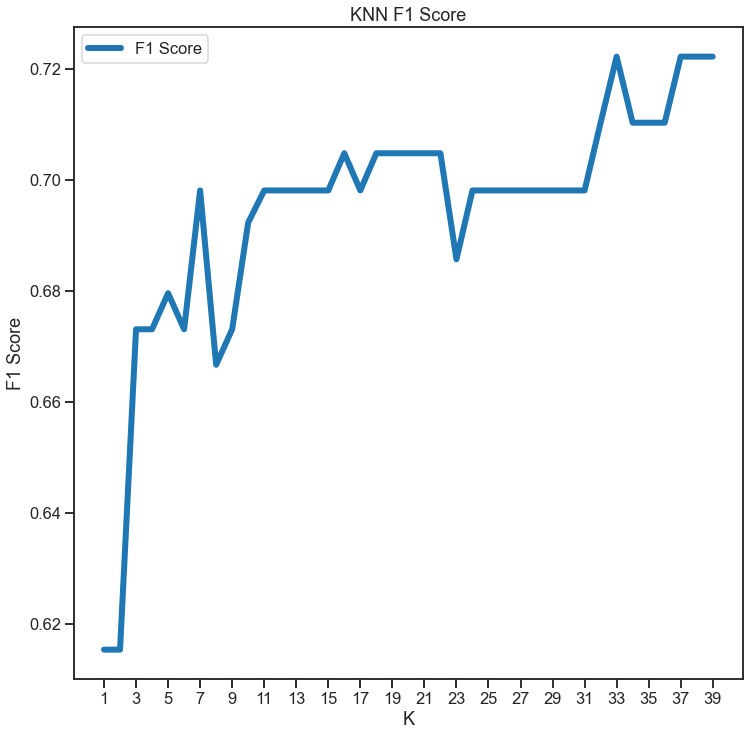

In [53]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot( figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

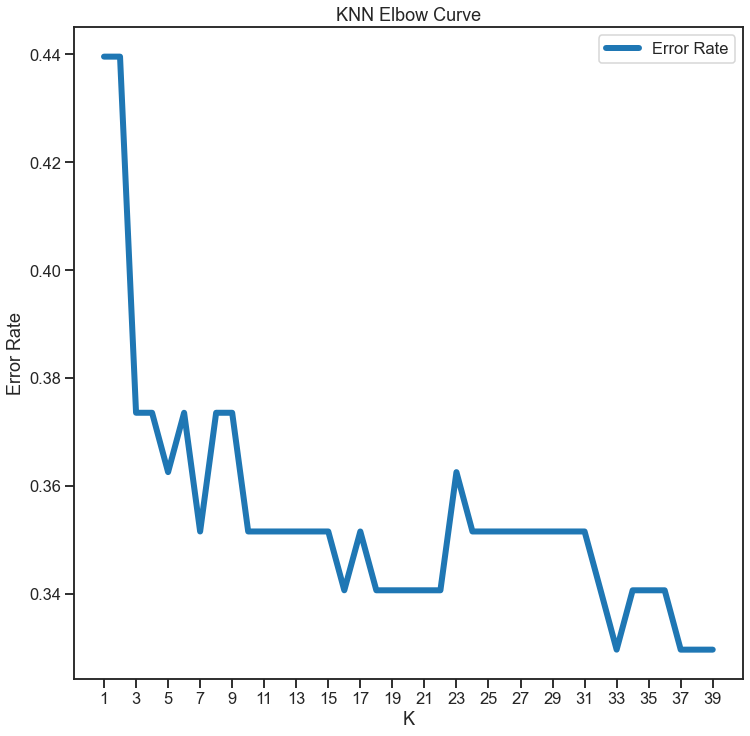

In [54]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot( figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

In [55]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns


### Decission Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [57]:
dt.tree_.node_count, dt.tree_.max_depth

(69, 8)

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [59]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.725275
precision,1.0,0.765957
recall,1.0,0.720000
f1,1.0,0.742268


In [60]:
score_total = score_total.append({"model" :dt, 
                                  "accuracy": (accuracy_score(y_test, y_pred)),
                                  "precission":precision_score(y_test, y_pred),
                                  "recall":recall_score(y_test, y_pred),
                                  "F1":(f1_score(y_test, y_pred))},
                                 ignore_index=True)

score_total

,model,accuracy,precission,recall,F1
0,lr,0.747253,0.746663,0.747253,0.746135
1,l1,0.758242,0.758132,0.758242,0.756692
2,l2,0.747253,0.746663,0.747253,0.746135
3,KNeighborsClassifier(n_neighbors=3),0.626374,0.650000,0.700000,0.673077
4,KNeighborsClassifier(weights='distance'),0.637363,0.660000,0.700000,0.679612
5,DecisionTreeClassifier(random_state=42),0.670330,0.672414,0.780000,0.722222


In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [62]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(15, 3)

In [63]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [64]:
train_test_gr_error

,train,test
accuracy,0.853774,0.813187
precision,0.844262,0.811321
recall,0.895652,0.860000
f1,0.869198,0.834951


In [65]:
print(GR)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 9, 2),
                         'max_features': range(1, 14)},
             scoring='accuracy')


In [66]:
score_total = score_total.append({"model" :GR, 
                                  "accuracy": (accuracy_score(y_test, y_test_pred_gr)),
                                  "precission":precision_score(y_test, y_test_pred_gr),
                                  "recall":recall_score(y_test, y_test_pred_gr),
                                  "F1":(f1_score(y_test, y_test_pred_gr))},
                                 ignore_index=True)

score_total

,model,accuracy,precission,recall,F1
0,lr,0.747253,0.746663,0.747253,0.746135
1,l1,0.758242,0.758132,0.758242,0.756692
2,l2,0.747253,0.746663,0.747253,0.746135
3,KNeighborsClassifier(n_neighbors=3),0.626374,0.650000,0.700000,0.673077
4,KNeighborsClassifier(weights='distance'),0.637363,0.660000,0.700000,0.679612
5,DecisionTreeClassifier(random_state=42),0.670330,0.672414,0.780000,0.722222
6,GridSearchCV(estimator=DecisionTreeClassifier(...,0.813187,0.811321,0.860000,0.834951


In [67]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)

In [68]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(15, 3)

In [69]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

,train,test
MSE,0.111902,0.171335


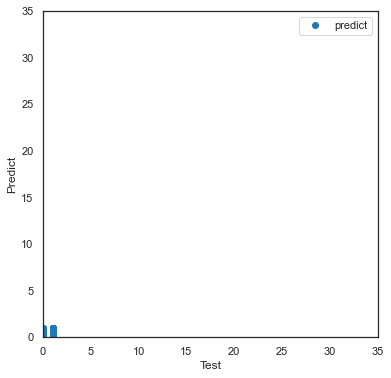

In [70]:
sns.set_context('notebook')
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.202830
20.0,0.198113
30.0,0.179245
40.0,0.174528
50.0,0.198113
100.0,0.188679
150.0,0.193396
200.0,0.179245
300.0,0.165094


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

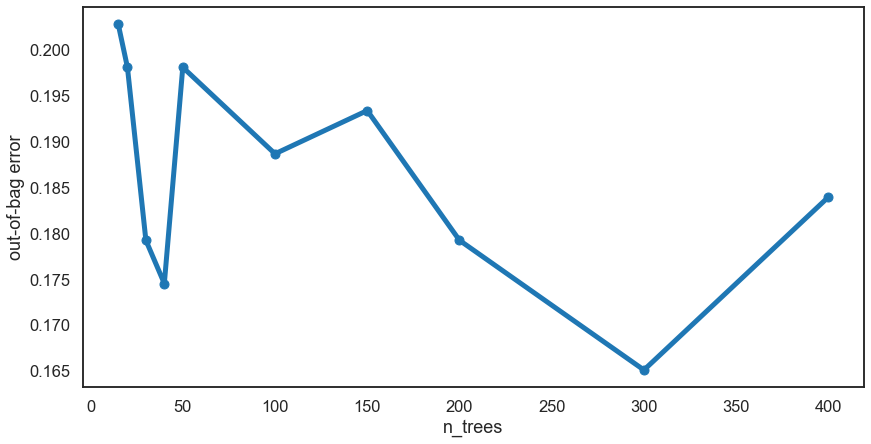

In [73]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

### Extra Trees Classifier

In [74]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.202830
20.0,0.169811
30.0,0.169811
40.0,0.165094
50.0,0.155660
100.0,0.146226
150.0,0.150943
200.0,0.155660
300.0,0.155660


In [75]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.202830,0.202830
20.0,0.198113,0.169811
30.0,0.179245,0.169811
40.0,0.174528,0.165094
50.0,0.198113,0.155660
100.0,0.188679,0.146226
150.0,0.193396,0.150943
200.0,0.179245,0.155660
300.0,0.165094,0.155660


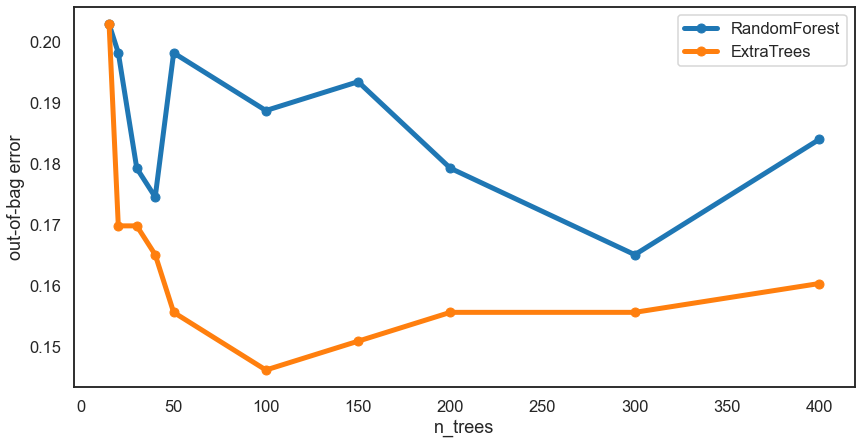

In [76]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [77]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [78]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

   accuracy  precision  recall        f1       auc
0  0.813187        0.8    0.88  0.838095  0.805854


In [79]:
print(model)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42,
                       warm_start=True)


In [80]:
score_df

,accuracy,precision,recall,f1,auc
0,0.813187,0.8,0.88,0.838095,0.805854


In [81]:
score_total = score_total.append({"model" : model, 
                                  "accuracy": (accuracy_score(y_test, y_pred)),
                                  "precission":precision_score(y_test, y_pred),
                                  "recall":recall_score(y_test, y_pred),
                                  "F1":(f1_score(y_test, y_pred))},
                                 ignore_index=True)

score_total

,model,accuracy,precission,recall,F1
0,lr,0.747253,0.746663,0.747253,0.746135
1,l1,0.758242,0.758132,0.758242,0.756692
2,l2,0.747253,0.746663,0.747253,0.746135
3,KNeighborsClassifier(n_neighbors=3),0.626374,0.650000,0.700000,0.673077
4,KNeighborsClassifier(weights='distance'),0.637363,0.660000,0.700000,0.679612
5,DecisionTreeClassifier(random_state=42),0.670330,0.672414,0.780000,0.722222
6,GridSearchCV(estimator=DecisionTreeClassifier(...,0.813187,0.811321,0.860000,0.834951
7,"(DecisionTreeClassifier(max_features='auto', r...",0.813187,0.800000,0.880000,0.838095


In [82]:
score_total.style.set_properties(subset=['model'], **{'width': '300px'})

,model,accuracy,precission,recall,F1
0,lr,0.747253,0.746663,0.747253,0.746135
1,l1,0.758242,0.758132,0.758242,0.756692
2,l2,0.747253,0.746663,0.747253,0.746135
3,KNeighborsClassifier(n_neighbors=3),0.626374,0.650000,0.700000,0.673077
4,KNeighborsClassifier(weights='distance'),0.637363,0.660000,0.700000,0.679612
5,DecisionTreeClassifier(random_state=42),0.670330,0.672414,0.780000,0.722222
6,"GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1, param_grid={'max_depth': range(1, 9, 2), 'max_features': range(1, 14)}, scoring='accuracy')",0.813187,0.811321,0.860000,0.834951
7,"RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42, warm_start=True)",0.813187,0.800000,0.880000,0.838095


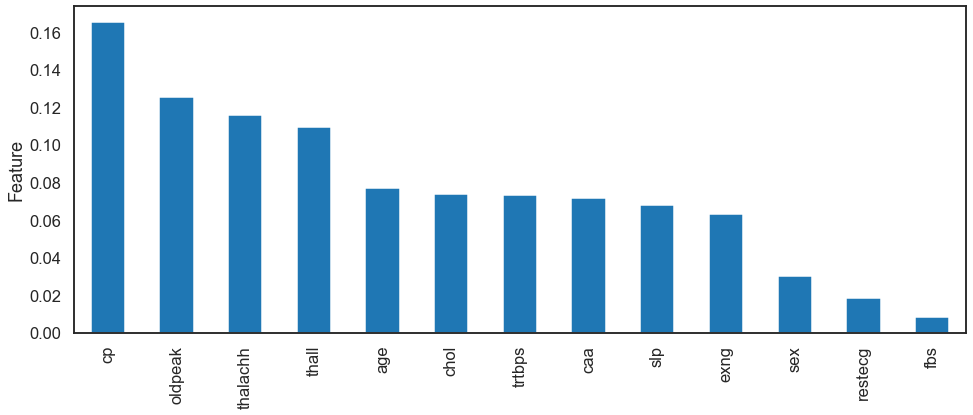

In [83]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

In [84]:
# sns.pairplot(data)